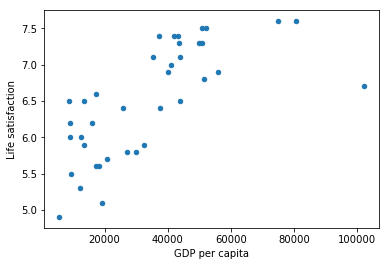

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

#Load data
oecdi_bli = pd.read_csv( "oecdi_bli_2015.csv", thousands = ',' )
gdp_per_capita = pd.read_csv( "gdp_per_capita.csv", thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = 'n/a' )

def prepare_country_stats( oecdi_bli, gdp_per_capita ):
    #Rename column
    gdp_per_capita.rename( columns = { '2015': 'GDP per capita' }, inplace = True )
    oecdi_bli.rename( columns = {'Value': 'Life satisfaction'}, inplace = True )
    
    #Prepare dataframe to contain only Life Satisfaction data
    newOecdi_bli = oecdi_bli.loc[ (oecdi_bli['Indicator'] == 'Life satisfaction') & (oecdi_bli['Inequality'] == 'Total') ]
        
    #Rename column
    newOecdi_bli.rename( columns = {'Value': 'Life satisfaction'})
    
    return pd.merge( newOecdi_bli, gdp_per_capita, on = 'Country' )

country_stats = prepare_country_stats( oecdi_bli, gdp_per_capita );

#Get main infos
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualize data
country_stats.plot( kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction' )
plt.show()


In [46]:
country_stats.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,...,Reference Period,Life satisfaction,Flag Codes,Flags,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,...,NaN,7.3,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
1,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,...,NaN,7.1,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
2,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,...,NaN,6.9,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
3,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,...,NaN,7.4,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0
4,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,...,NaN,6.6,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [63]:
#Using Linear Regression

#Creating model
linearModel = sklearn.linear_model.LinearRegression()
#Training with all dataset
linearModel.fit( X,y )
#Predicting
linearModel.predict( [[22587]] )


array([[ 6.2228105]])

In [64]:
#Using K-nearest Neighbor Regression
knnModel = sklearn.neighbors.KNeighborsRegressor( n_neighbors = 3 )
#Training model
knnModel.fit( X,y )
#Predicting
knnModel.predict( [[22587]] )


array([[ 5.73333333]])